In [ ]:
!git clone https://github.com/VIPranowo/Track
# !git clone https://github.com/rslim087a/track

fatal: destination path 'Track' already exists and is not an empty directory.


In [ ]:
!ls Track

driving_log.csv  IMG


In [ ]:
!pip3 install imgaug

In [ ]:
import os
import numpy as np

# !pip install tensorflow==1.4.0
%tensorflow_version 1.x
import tensorflow 
print(tensorflow.__version__)


import matplotlib.pyplot as plt

!pip install keras==2.2.5
import keras
print(keras.__version__)

import matplotlib.image as mpimg
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import cv2
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa

import ntpath
import random

1.15.2
2.2.5


In [ ]:
# np.random.seed(0)
datadir='Track'
columns= ["center","left","right","steering","throttle","reverse","speed"]
data = pd.read_csv(os.path.join(datadir,"driving_log.csv"),names=columns)
pd.set_option("display.max_colwidth",-1)
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


,center,left,right,steering,throttle,reverse,speed
0,/home/biovick/Downloads/course/selfdriving/lanedetection/data/IMG/center_2020_04_07_20_53_07_049.jpg,/home/biovick/Downloads/course/selfdriving/lanedetection/data/IMG/left_2020_04_07_20_53_07_049.jpg,/home/biovick/Downloads/course/selfdriving/lanedetection/data/IMG/right_2020_04_07_20_53_07_049.jpg,0.0,0.0,0.0,0.000078
1,/home/biovick/Downloads/course/selfdriving/lanedetection/data/IMG/center_2020_04_07_20_53_07_183.jpg,/home/biovick/Downloads/course/selfdriving/lanedetection/data/IMG/left_2020_04_07_20_53_07_183.jpg,/home/biovick/Downloads/course/selfdriving/lanedetection/data/IMG/right_2020_04_07_20_53_07_183.jpg,0.0,0.0,0.0,0.000078
2,/home/biovick/Downloads/course/selfdriving/lanedetection/data/IMG/center_2020_04_07_20_53_07_344.jpg,/home/biovick/Downloads/course/selfdriving/lanedetection/data/IMG/left_2020_04_07_20_53_07_344.jpg,/home/biovick/Downloads/course/selfdriving/lanedetection/data/IMG/right_2020_04_07_20_53_07_344.jpg,0.0,0.0,0.0,0.000079
3,/home/biovick/Downloads/course/selfdriving/lanedetection/data/IMG/center_2020_04_07_20_53_07_485.jpg,/home/biovick/Downloads/course/selfdriving/lanedetection/data/IMG/left_2020_04_07_20_53_07_485.jpg,/home/biovick/Downloads/course/selfdriving/lanedetection/data/IMG/right_2020_04_07_20_53_07_485.jpg,0.0,0.0,0.0,0.000079
4,/home/biovick/Downloads/course/selfdriving/lanedetection/data/IMG/center_2020_04_07_20_53_07_604.jpg,/home/biovick/Downloads/course/selfdriving/lanedetection/data/IMG/left_2020_04_07_20_53_07_604.jpg,/home/biovick/Downloads/course/selfdriving/lanedetection/data/IMG/right_2020_04_07_20_53_07_604.jpg,0.0,0.0,0.0,0.000079


In [ ]:
def path_leaf(path):
  head,tail = ntpath.split(path)
  return tail

data['center']= data['center'].apply(path_leaf)
data['left']=data['left'].apply(path_leaf)
data['right']=data['right'].apply(path_leaf)
data.head

<bound method NDFrame.head of                                   center  ...      speed
0     center_2020_04_07_20_53_07_049.jpg  ...  0.000078 
1     center_2020_04_07_20_53_07_183.jpg  ...  0.000078 
2     center_2020_04_07_20_53_07_344.jpg  ...  0.000079 
3     center_2020_04_07_20_53_07_485.jpg  ...  0.000079 
4     center_2020_04_07_20_53_07_604.jpg  ...  0.000079 
...                                  ...  ...       ... 
6980  center_2020_04_09_16_42_51_130.jpg  ...  10.054720
6981  center_2020_04_09_16_42_51_271.jpg  ...  9.913718 
6982  center_2020_04_09_16_42_51_390.jpg  ...  9.794428 
6983  center_2020_04_09_16_42_51_530.jpg  ...  9.657073 
6984  center_2020_04_09_16_42_51_671.jpg  ...  9.521644 

[6985 rows x 7 columns]>

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]
1.0


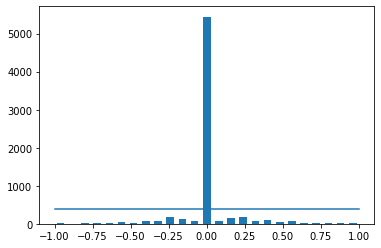

In [ ]:
num_bins=25
samples_per_bin=400   #to maximize the samples only 200 samples
hist, bins = np.histogram(data['steering'],num_bins)
print(bins)
center = (bins[:-1]+bins[1:])*0.5
plt.bar(center, hist, width=0.05)
print(np.max(data['steering']))
plt.plot((np.min(data['steering']),np.max(data['steering'])),(samples_per_bin, samples_per_bin))

total data: 6985
removed 5044
remaining 1941


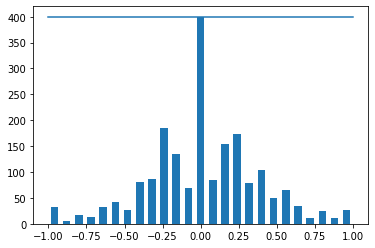

In [ ]:
print('total data:', len(data))
remove_list=[]
for j in range(num_bins):
  list_= []
  for i in range(len(data['steering'])):
    if data['steering'][i]>=bins[j] and data['steering'][i]<=bins[j+1]:
      list_.append(i)
  list_= shuffle(list_)
  list_= list_[samples_per_bin:]
  remove_list.extend(list_)

print('removed', len(remove_list))
data.drop(data.index[remove_list],inplace=True)
print('remaining', len(data))

hist,_ = np.histogram(data['steering'],(num_bins))
plt.bar(center,hist,width=0.05)
plt.plot((np.min(data['steering']),np.max(data['steering'])),(samples_per_bin, samples_per_bin))

In [ ]:
# print(data.iloc[1])
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left,right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(indexed_data[3])
  image_paths= np.asarray(image_path)
  steerings= np.asarray (steering)
  return image_paths,steerings

image_paths, steerings = load_img_steering(datadir + '/IMG',data)
# print(image_paths)

In [ ]:
X_train, X_valid, y_train, y_valid= train_test_split(image_paths , steerings, test_size=0.2, random_state=6)
# print(X_train,y_train)  --> image_paths and steering direction
print('Training samples: {}\nValid Samples: {}'.format(len(X_train),len(X_valid)))

Training samples: 1552
Valid Samples: 389


Text(0.5, 1.0, 'Validation set')

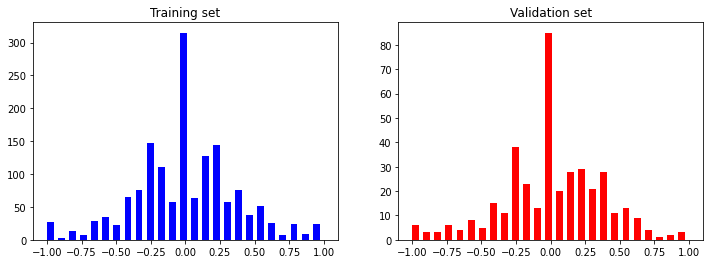

In [ ]:
fig,axes= plt.subplots(1,2,figsize=(12,4))
axes[0].hist(y_train, bins= num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [ ]:
def zoom(image):
  zoom = iaa.Affine(scale=(1,1.3))
  image = zoom.augment_image(image)
  return image

Text(0.5, 1.0, 'Zoomed Image')

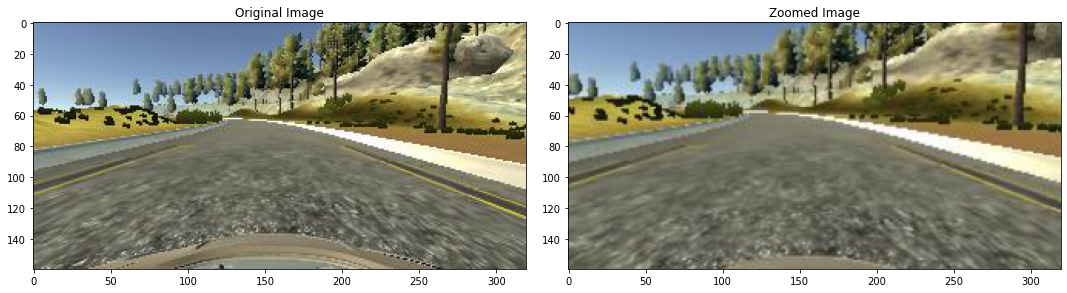

In [ ]:
image = image_paths[random.randint(0,1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title("Original Image")

axs[1].imshow(zoomed_image)
axs[1].set_title("Zoomed Image")

In [ ]:
def pan(image):
  pan = iaa.Affine(translate_percent= {"x": (-0.1,0.1), "y":(-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

Text(0.5, 1.0, 'Panned Image')

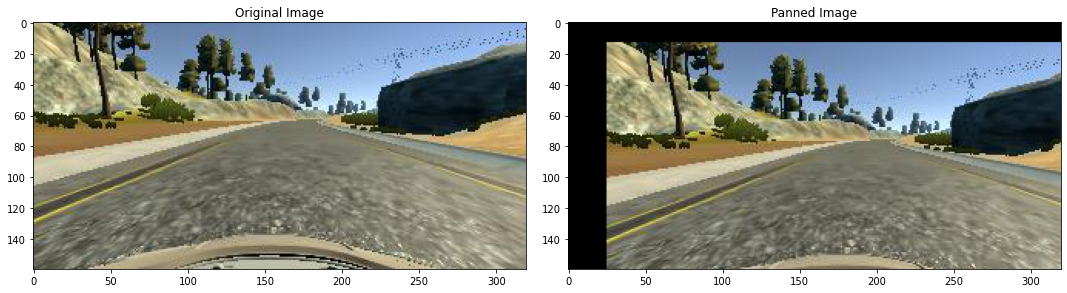

In [ ]:
image = image_paths[random.randint(0,1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original Image")

axs[1].imshow(panned_image)
axs[1].set_title("Panned Image")

In [ ]:
#altering brightness
def img_random_brightness(image):
  brightness = iaa.Multiply((0.2, 1.2))
  image = brightness.augment_image(image)
  return image

Text(0.5, 1.0, 'Brightness altered Image')

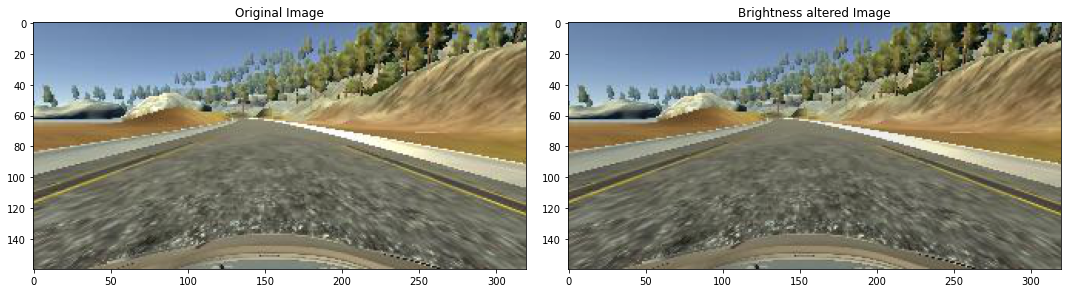

In [ ]:
image = image_paths[random.randint(0,1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)

fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original Image")

axs[1].imshow(brightness_altered_image)
axs[1].set_title("Brightness altered Image")

In [ ]:
def img_random_flip(image,steering_angle):
  image = cv2.flip(image, 1)
  steering_angle= -steering_angle
  return image, steering_angle


Text(0.5, 1.0, 'Flipped Image - Steering Angle:-0.24280789999999997')

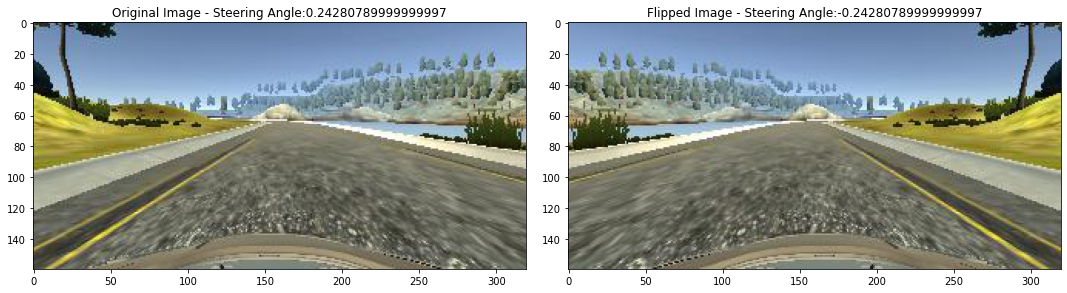

In [ ]:
random_index = random.randint(0,1000)
image = image_paths[random_index]
steering_angle= steerings[random_index]

original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("Original Image - " + "Steering Angle:" + str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title("Flipped Image - " + "Steering Angle:" + str(flipped_steering_angle))

In [ ]:
def random_augment(image, steering_angle):
  image = mpimg.imread(image)
  if(np.random.rand()<0.5):
    image = pan(image)
  if(np.random.rand()<0.5):
    image = zoom(image)
  if(np.random.rand()<0.5):
    image = img_random_brightness(image)
  if(np.random.rand()<0.5):
    image, steering_angle = img_random_flip(image, steering_angle)
  return image, steering_angle

In [ ]:
ncol = 2
nrow = 10
fig,axs= plt.subplots(nrow,ncol, figsize= (15,50))
fig.tight_layout()

for i in range (nrow):
  randnum= random.randint(0, len(image_paths)-1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]

  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)

  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")

  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")


In [ ]:
#preprocessing data
def img_preprocess(img):
  # img = mpimg.imread(img)
  img = img[60:135, :,:]
  img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV) #nvidia new role model
  img = cv2.GaussianBlur(img, (3,3),0)
  img = cv2.resize(img, (200,66)) ##nvidia model architecture
  img = img/255 ##normalization
  return img

Text(0.5, 1.0, 'Preprocessed Image')

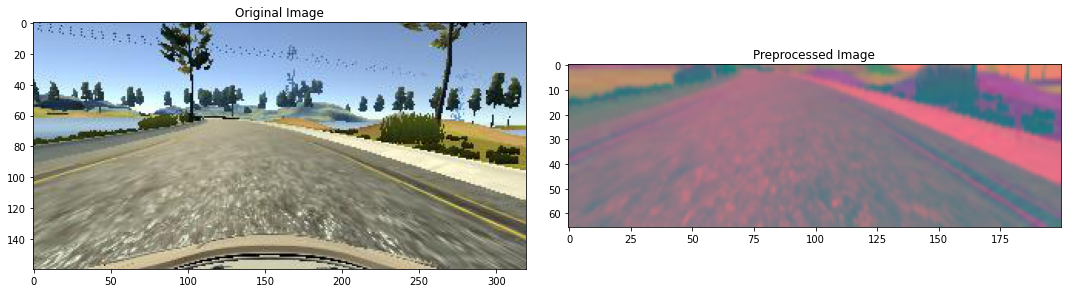

In [ ]:
image = image_paths[100]
original_image = mpimg.imread(image)  #read it into array of image
# print(original_image.size)
preprocessed_image= img_preprocess(original_image)

fig,axs = plt.subplots(1,2, figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title("Original Image")
axs[1].imshow(preprocessed_image)
axs[1].set_title("Preprocessed Image")

In [ ]:
def batch_generator(image_paths, steering_ang, batch_size, istraining ):
  while True:
    batch_img=[]
    batch_steering=[]

    for i in range(batch_size):
      random_index= random.randint(0, len(image_paths)-1)

      if(istraining):
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield(np.asarray(batch_img),np.asarray(batch_steering))

Text(0.5, 1.0, 'Validation Image')

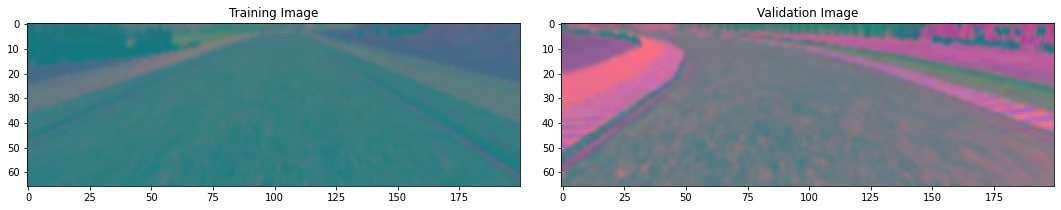

In [ ]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train , 1,1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid , 1,0))

fig,axs = plt.subplots(1,2, figsize=(15,10))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title("Training Image")
axs[1].imshow(x_valid_gen[0])
axs[1].set_title("Validation Image")

In [ ]:
# X_train= np.array(list(map(img_preprocess, X_train)))
# X_valid =np.array(list(map(img_preprocess, X_valid)))
# # print(X_train)

In [ ]:
# plt.imshow(X_train[random.randint(0,len(X_train)-1)])
# plt.axis('off')
# print(X_train.shape)  #(1392,66,200,3)  -->jumlah_train, height,width, and channelcolor

In [ ]:
#behavioral cloning using nvidia model
def nvidia_model():
  model = Sequential()
  model.add(Conv2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66,200,3),activation='elu'))
  model.add(Conv2D(36, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Conv2D(48, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))

  model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
  # model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(100, activation='elu'))
  # model.add(Dropout(0.5))

  model.add(Dense(50, activation='elu'))
  # model.add(Dropout(0.5))

  model.add(Dense(10, activation ='elu'))
  # model.add(Dropout(0.5))

  model.add(Dense(1))

  optimizer= Adam(lr=1e-4)
  model.compile(loss='mse', optimizer=optimizer)
  return model

In [ ]:
model = nvidia_model()
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 100)              

In [ ]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid), batch_size=100, verbose=1, shuffle=1)
history = model.fit_generator(batch_generator(X_train, y_train, 100,1),
                              steps_per_epoch=300,
                              epochs=10,
                              validation_data=batch_generator(X_valid,y_valid, 100,0),
                              validation_steps=200,
                              verbose=1,
                              shuffle=1)

Epoch 1/10
300/300 [==============================] - 176s 586ms/step - loss: 0.1130 - val_loss: 0.0902
Epoch 2/10
300/300 [==============================] - 170s 565ms/step - loss: 0.0955 - val_loss: 0.0825
Epoch 3/10
300/300 [==============================] - 169s 563ms/step - loss: 0.0885 - val_loss: 0.0679
Epoch 4/10
300/300 [==============================] - 170s 567ms/step - loss: 0.0817 - val_loss: 0.0685
Epoch 5/10
300/300 [==============================] - 169s 564ms/step - loss: 0.0726 - val_loss: 0.0521
Epoch 6/10
300/300 [==============================] - 174s 581ms/step - loss: 0.0706 - val_loss: 0.0464
Epoch 7/10
300/300 [==============================] - 173s 577ms/step - loss: 0.0673 - val_loss: 0.0459
Epoch 8/10
300/300 [==============================] - 172s 572ms/step - loss: 0.0649 - val_loss: 0.0463
Epoch 9/10
300/300 [==============================] - 172s 574ms/step - loss: 0.0625 - val_loss: 0.0466
Epoch 10/10
300/300 [==============================] - 172s 575m

Text(0.5, 0, 'epoch')

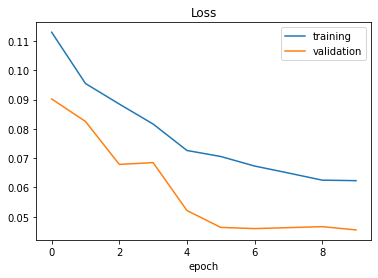

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')

In [ ]:
model.save('model.h5')

In [ ]:
from google.colab import files
files.download('model.h5')